In [2]:
import pandas as pd

def load_some_data(path, separ = ','):
    return pd.read_csv(path, sep=separ, parse_dates = ['datetime'], index_col='datetime')

events_battle = load_some_data(r'data/events_battle.txt')
events_hero = load_some_data(r'data/events_hero.txt')
events_level = load_some_data(r'data/events_level.txt', '\t')
events_payment = pd.read_csv(r'data/events_payment.txt', parse_dates = ['created'], index_col='created')
events_quest = load_some_data(r'data/events_quest.txt')
events_resource = load_some_data(r'data/events_resource.txt')
events_user = load_some_data(r'data/events_user.txt')

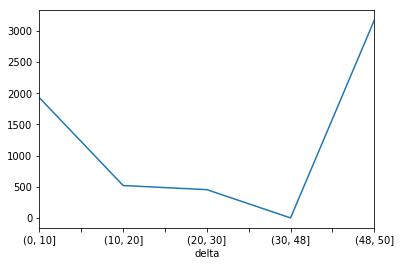

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def group_users_by_average_xp_growth():
    average_xp_growth = events_level.groupby('user_id').agg('mean')['delta']
    intervals = [0, 10, 20, 30, 48, 50]
    groups = average_xp_growth.groupby(pd.cut(average_xp_growth, intervals)).count()
    return groups

group_users_by_average_xp_growth().plot.line()

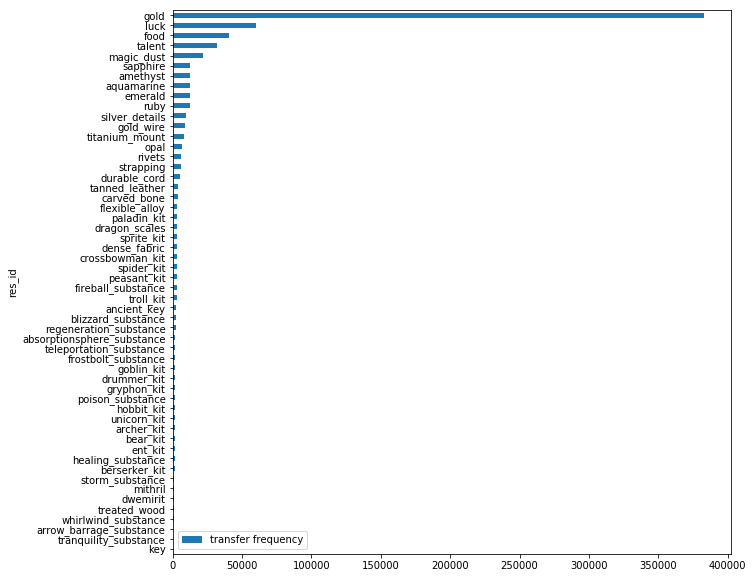

In [10]:
# Список типов ресурсов
def get_resource_types():
    groups = events_resource.groupby('res_id').count()
    groups['transfer frequency'] = groups['id']
    groups = groups[['transfer frequency']]
    return groups.sort_values(by='transfer frequency')

get_resource_types().plot.barh(figsize=(10,10))

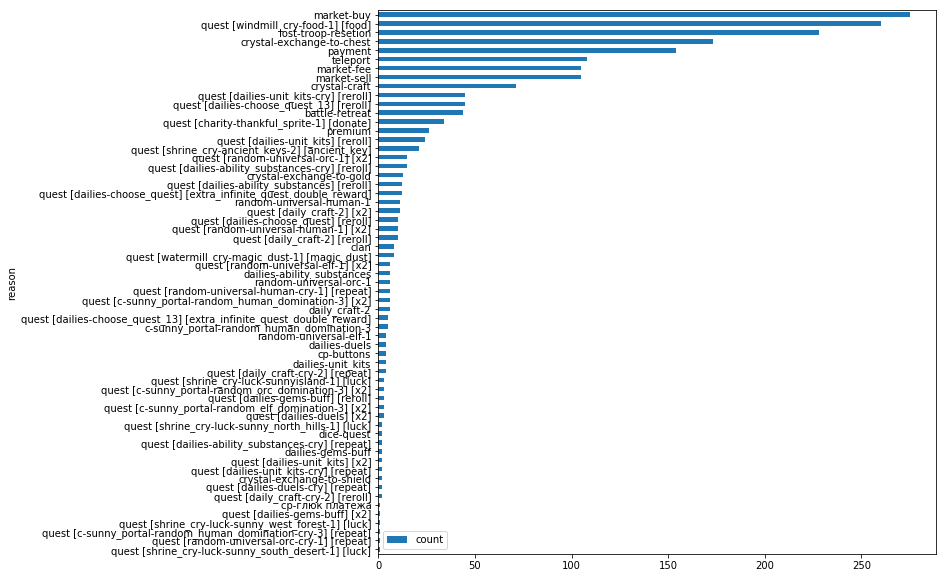

In [7]:
def rank_payment_reasons():
    reasons = events_payment.groupby('reason').count()
    reasons['count'] = reasons['crystal_payment_id']
    return reasons[['count']].sort_values(by='count')
    
rank_payment_reasons().plot.barh(figsize=(10, 10))